In [1]:
import torch, torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as opt
import torchvision.transforms as transforms
import numpy as np
import os
from PIL import Image
from IPython import display
import matplotlib.pyplot as plt
%matplotlib inline
device = "cuda"

In [2]:
model = torchvision.models.vgg16(pretrained=True)
model.eval()
model = model.to(device)
#0-3 conv1 5-8 conv2 10-15 conv3 17-22 conv4 24-29 conv5 
conv1_1 = nn.Sequential(*list(model.features)[0:1])
conv2_1 = nn.Sequential(*list(model.features)[1:6])
conv3_1 = nn.Sequential(*list(model.features)[6:11])
conv4_1 = nn.Sequential(*list(model.features)[11:18])
conv4_2 = nn.Sequential(*list(model.features)[18:20])
conv5_1 = nn.Sequential(*list(model.features)[20:25])
print(conv5_1)

Sequential(
  (0): ReLU(inplace=True)
  (1): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (4): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
)


In [3]:
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 224, 224])


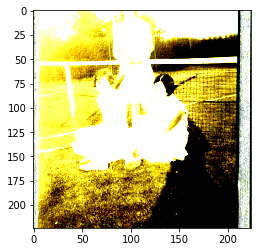

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 224, 224])


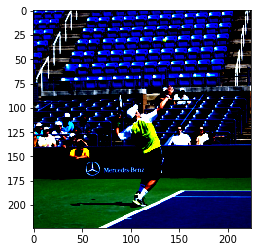

In [4]:
style_img = preprocess(Image.open("/export/data/dataset/COCO/train2014/COCO_train2014_000000581839.jpg"))
print(style_img.shape)
plt.imshow(style_img.numpy().transpose(1,2,0))
plt.show()
content_img = preprocess(Image.open("/export/data/dataset/COCO/train2014/COCO_train2014_000000321991.jpg"))
print(content_img.shape)
plt.imshow(content_img.numpy().transpose(1,2,0))
plt.show()
style_img = style_img.unsqueeze_(0)
content_img = content_img.unsqueeze_(0)
style_img = style_img.to(device)
content_img = content_img.to(device)

In [55]:
def gram(feature):
    c = feature.shape[1]
    feature = feature.view(c,-1)
    ret = feature.matmul(feature.T)
    return ret
def calc_styleloss(x_convn, style_convn):
    return 1/(4*(x_convn.shape[1]**2)*((x_convn.shape[2]*x_convn.shape[3])**2))*torch.sum((gram(x_convn)-gram(style_convn))**2)
def calc_total_variation_loss(x):
    a = x[:,:,:-1,:-1] - x[:,:,1:,:-1]
    b = x[:,:,:-1,:-1] - x[:,:,1:,1:]
    return torch.sum((a**2 + b**2)**1.25)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0
tensor(19984648., device='cuda:0', grad_fn=<MulBackward0>) tensor(51.2694, device='cuda:0', grad_fn=<AddBackward0>)


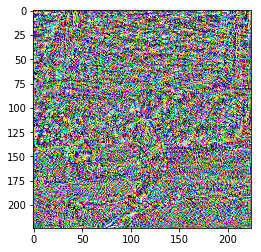

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


10
tensor(19984648., device='cuda:0', grad_fn=<MulBackward0>) tensor(51.2694, device='cuda:0', grad_fn=<AddBackward0>)


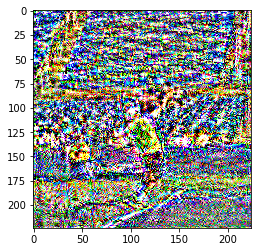

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


20
tensor(19984648., device='cuda:0', grad_fn=<MulBackward0>) tensor(51.2694, device='cuda:0', grad_fn=<AddBackward0>)


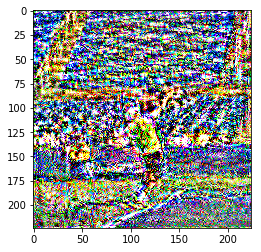

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


30
tensor(19984648., device='cuda:0', grad_fn=<MulBackward0>) tensor(51.2694, device='cuda:0', grad_fn=<AddBackward0>)


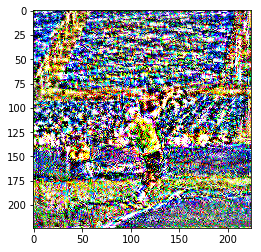

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


40
tensor(19984648., device='cuda:0', grad_fn=<MulBackward0>) tensor(51.2694, device='cuda:0', grad_fn=<AddBackward0>)


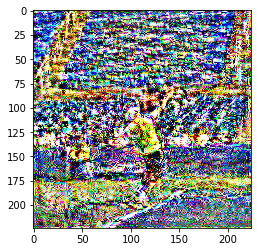

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


50
tensor(19984648., device='cuda:0', grad_fn=<MulBackward0>) tensor(51.2694, device='cuda:0', grad_fn=<AddBackward0>)


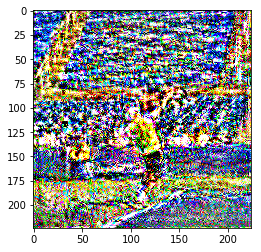

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


60
tensor(19984648., device='cuda:0', grad_fn=<MulBackward0>) tensor(51.2694, device='cuda:0', grad_fn=<AddBackward0>)


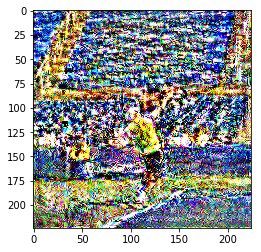

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


70
tensor(19984648., device='cuda:0', grad_fn=<MulBackward0>) tensor(51.2694, device='cuda:0', grad_fn=<AddBackward0>)


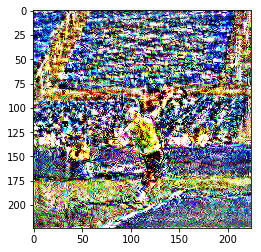

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


80
tensor(19984648., device='cuda:0', grad_fn=<MulBackward0>) tensor(51.2694, device='cuda:0', grad_fn=<AddBackward0>)


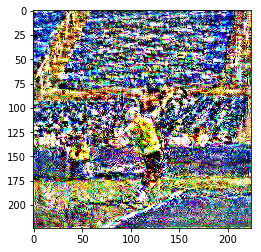

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


90
tensor(19984648., device='cuda:0', grad_fn=<MulBackward0>) tensor(51.2694, device='cuda:0', grad_fn=<AddBackward0>)


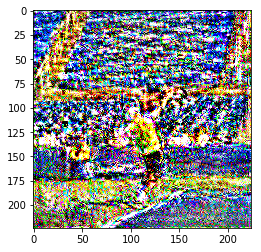

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


100
tensor(19984648., device='cuda:0', grad_fn=<MulBackward0>) tensor(51.2694, device='cuda:0', grad_fn=<AddBackward0>)


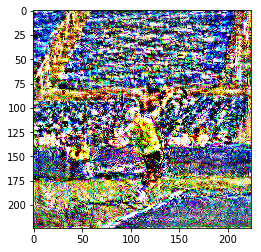

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


110
tensor(19984648., device='cuda:0', grad_fn=<MulBackward0>) tensor(51.2694, device='cuda:0', grad_fn=<AddBackward0>)


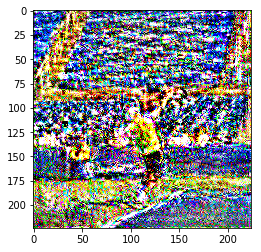

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


120
tensor(19984648., device='cuda:0', grad_fn=<MulBackward0>) tensor(51.2694, device='cuda:0', grad_fn=<AddBackward0>)


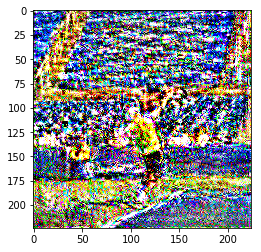

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


130
tensor(19984648., device='cuda:0', grad_fn=<MulBackward0>) tensor(51.2694, device='cuda:0', grad_fn=<AddBackward0>)


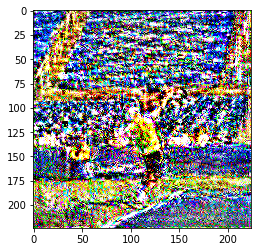

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


140
tensor(19984648., device='cuda:0', grad_fn=<MulBackward0>) tensor(51.2694, device='cuda:0', grad_fn=<AddBackward0>)


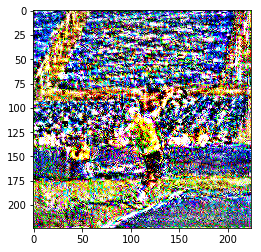

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


150
tensor(19984648., device='cuda:0', grad_fn=<MulBackward0>) tensor(51.2694, device='cuda:0', grad_fn=<AddBackward0>)


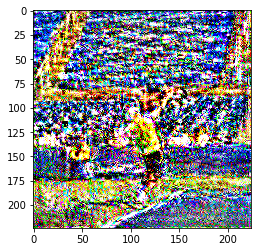

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


160
tensor(19984648., device='cuda:0', grad_fn=<MulBackward0>) tensor(51.2694, device='cuda:0', grad_fn=<AddBackward0>)


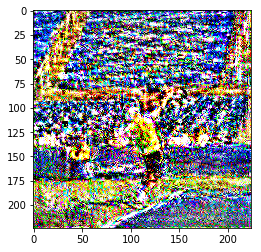

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


170
tensor(19984648., device='cuda:0', grad_fn=<MulBackward0>) tensor(51.2694, device='cuda:0', grad_fn=<AddBackward0>)


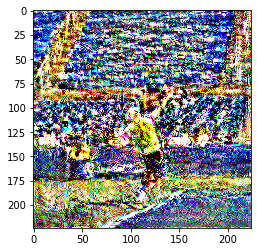

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


180
tensor(19984648., device='cuda:0', grad_fn=<MulBackward0>) tensor(51.2694, device='cuda:0', grad_fn=<AddBackward0>)


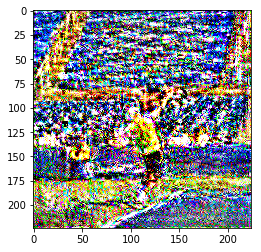

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


190
tensor(19984648., device='cuda:0', grad_fn=<MulBackward0>) tensor(51.2694, device='cuda:0', grad_fn=<AddBackward0>)


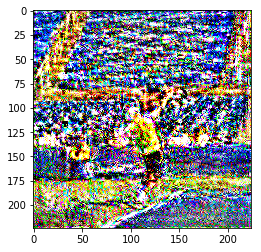

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


200
tensor(19984648., device='cuda:0', grad_fn=<MulBackward0>) tensor(51.2694, device='cuda:0', grad_fn=<AddBackward0>)


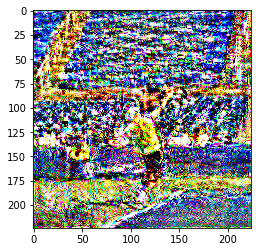

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


210
tensor(19984648., device='cuda:0', grad_fn=<MulBackward0>) tensor(51.2694, device='cuda:0', grad_fn=<AddBackward0>)


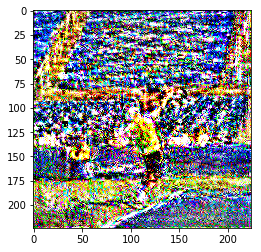

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


220
tensor(19984648., device='cuda:0', grad_fn=<MulBackward0>) tensor(51.2694, device='cuda:0', grad_fn=<AddBackward0>)


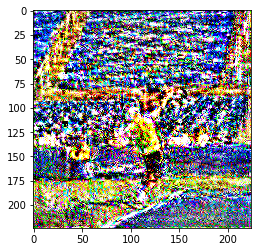

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


230
tensor(19984648., device='cuda:0', grad_fn=<MulBackward0>) tensor(51.2694, device='cuda:0', grad_fn=<AddBackward0>)


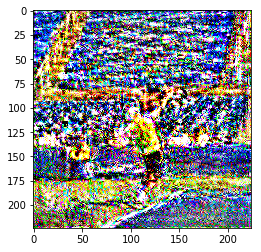

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


240
tensor(19984648., device='cuda:0', grad_fn=<MulBackward0>) tensor(51.2694, device='cuda:0', grad_fn=<AddBackward0>)


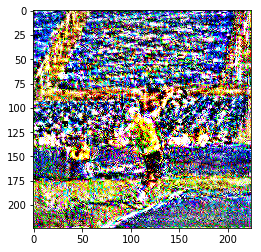

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


250
tensor(19984648., device='cuda:0', grad_fn=<MulBackward0>) tensor(51.2694, device='cuda:0', grad_fn=<AddBackward0>)


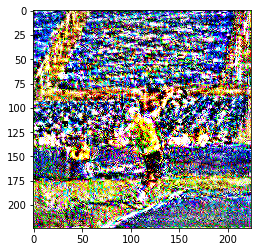

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


260
tensor(19984648., device='cuda:0', grad_fn=<MulBackward0>) tensor(51.2694, device='cuda:0', grad_fn=<AddBackward0>)


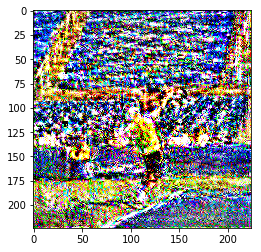

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


270
tensor(19984648., device='cuda:0', grad_fn=<MulBackward0>) tensor(51.2694, device='cuda:0', grad_fn=<AddBackward0>)


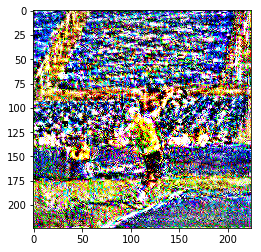

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


280
tensor(19984648., device='cuda:0', grad_fn=<MulBackward0>) tensor(51.2694, device='cuda:0', grad_fn=<AddBackward0>)


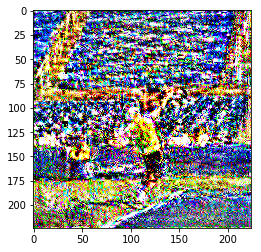

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


290
tensor(19984648., device='cuda:0', grad_fn=<MulBackward0>) tensor(51.2694, device='cuda:0', grad_fn=<AddBackward0>)


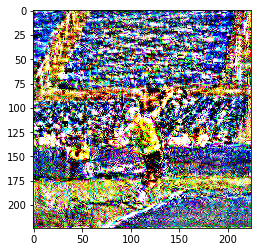

In [70]:
style_conv1_1 = conv1_1(style_img).detach()
style_conv2_1 = conv2_1(style_conv1_1).detach()
style_conv3_1 = conv3_1(style_conv2_1).detach()
style_conv4_1 = conv4_1(style_conv3_1).detach()
style_conv5_1 = conv5_1(conv4_2(style_conv4_1)).detach()
content_conv4_2 = conv4_2(conv4_1(conv3_1(conv2_1(conv1_1(content_img))))).detach()

#x = content_img
x = torch.rand_like(content_img).to(device)
x.requires_grad = True
optim = opt.LBFGS(params=[x])
for itr in range(300):
    def closure():
        x_conv1_1 = conv1_1(x)
        x_conv2_1 = conv2_1(x_conv1_1)
        x_conv3_1 = conv3_1(x_conv2_1)
        x_conv4_1 = conv4_1(x_conv3_1)
        x_conv4_2 = conv4_2(x_conv4_1)
        x_conv5_1 = conv5_1(x_conv4_2)
        #x_conv4_2 = conv4_2(conv4_1(conv3_1(conv2_1(conv1_1(x)))))
        l_content = 1/2*torch.sum((x_conv4_2 - content_conv4_2)**2)
        #print(x_conv4_2.shape)
        #print(content_conv4_2.shape)
        l_s = []
        #if x.grad is not None:
        #    x.grad.data.zero_()
        #calc_styleloss(x_conv1_1, style_conv1_1).backward(retain_graph=True)
        #optim.step()
        l_s.append(calc_styleloss(x_conv1_1, style_conv1_1))
        l_s.append(calc_styleloss(x_conv2_1, style_conv2_1))
        l_s.append(calc_styleloss(x_conv3_1, style_conv3_1))
        l_s.append(calc_styleloss(x_conv4_1, style_conv4_1))
        l_s.append(calc_styleloss(x_conv5_1, style_conv5_1))
        w_s = [5,1,1,1,1]
        l_style = 0
        for w,l in zip(w_s, l_s):
            l_style += w*l
        l_total_v = calc_total_variation_loss(x)
        loss =  l_content*0.025 + l_style + l_total_v*1e-4
        optim.zero_grad()
        loss.backward()
        return loss
    optim.step(closure)
    
    if itr % 10 == 0:
        print(itr)
        print(l_content,l_style)
        plt.imshow(x.detach().cpu().numpy().squeeze(0).transpose(1,2,0))
        plt.show()
